The Dataset has been collected from **Air Quality Open Data Platform**

https://aqicn.org/data-platform/covid19/

### Dataset Pre-processing

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import folium

In [2]:
# Set plot style for better visuals
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)

In [3]:
df = pd.read_csv('china_dataset.csv', on_bad_lines='skip')

In [4]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,2015-01-04,CN,Beijing,pm25,450,80.0,494.0,255.0,65212.90
1,2015-01-12,CN,Beijing,pm25,449,91.0,326.0,181.0,8349.02
2,2015-02-17,CN,Beijing,pm25,336,13.0,197.0,68.0,10622.50
3,2015-06-11,CN,Beijing,pm25,416,13.0,209.0,57.0,30655.90
4,2015-06-13,CN,Beijing,pm25,446,13.0,140.0,42.0,5978.25


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Feature Engineering: Add time-based features
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

In [7]:
# Define seasons
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

In [8]:
df['season'] = df['month'].apply(get_season)

In [9]:
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")

Date range: 2014-12-29 00:00:00 to 2025-04-29 00:00:00


In [10]:
print(f"Total Cities in dataset ({len(df['City'].unique())}):\n {df['City'].unique()}")

Total Cities in dataset (52):
 ['Beijing' 'Jieyang' 'Kunming' 'Hangzhou' 'Chongqing' 'Qingdao' 'Haikou'
 'Ürümqi' 'Qiqihar' 'Guiyang' 'Shenzhen' 'Yunfu' 'Xuchang' 'Yinchuan'
 'Shenyang' 'Lhasa' 'Shanghai' 'Changchun' 'Foshan' 'Nanning' 'Fushun'
 'Hefei' 'Chengdu' 'Hohhot' 'Qinhuangdao' 'Shijiazhuang' 'Shantou'
 'Zhengzhou' 'Nanjing' 'Xining' 'Xi’an' 'Zhuzhou' 'Wuhan' 'Tianjin'
 'Changzhou' 'Nanchang' 'Shiyan' 'Xinxiang' 'Suzhou' 'Harbin' 'Lanzhou'
 'Jinan' 'Changsha' 'Hegang' 'Anyang' 'Wuxi' 'Taiyuan' 'Guangzhou'
 'Fuzhou' 'Ningbo' 'Xiamen' 'Dongguan']


In [11]:
print(f"Unique Species:\n {df['Specie'].unique()}")

Unique Species:
 ['pm25' 'no2' 'co' 'pm10' 'o3' 'so2']


### Processed Dataset Details

In [12]:
df.head()

,Date,Country,City,Specie,count,min,max,median,variance,year,month,season
0,2015-01-04,CN,Beijing,pm25,450,80.0,494.0,255.0,65212.90,2015,1,Winter
1,2015-01-12,CN,Beijing,pm25,449,91.0,326.0,181.0,8349.02,2015,1,Winter
2,2015-02-17,CN,Beijing,pm25,336,13.0,197.0,68.0,10622.50,2015,2,Winter
3,2015-06-11,CN,Beijing,pm25,416,13.0,209.0,57.0,30655.90,2015,6,Summer
4,2015-06-13,CN,Beijing,pm25,446,13.0,140.0,42.0,5978.25,2015,6,Summer


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893037 entries, 0 to 893036
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   Date      893037 non-null  datetime64[ns]
 1   Country   893037 non-null  object        
 2   City      893037 non-null  object        
 3   Specie    893037 non-null  object        
 4   count     893037 non-null  int64         
 5   min       893037 non-null  float64       
 6   max       893037 non-null  float64       
 7   median    893037 non-null  float64       
 8   variance  893037 non-null  float64       
 9   year      893037 non-null  int32         
 10  month     893037 non-null  int32         
 11  season    893037 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(4)
memory usage: 74.9+ MB


### Data Analysis

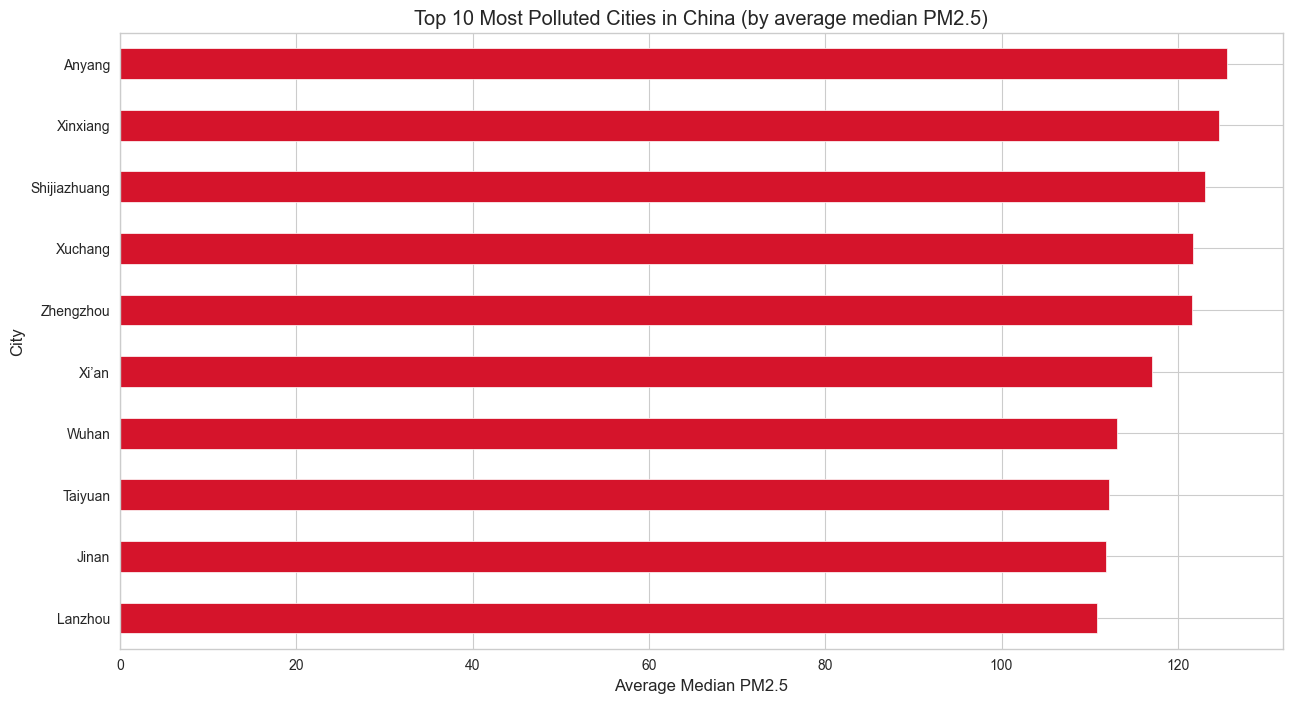

In [14]:
# Analyze median PM2.5 levels across Chinese cities
pm25_data = df[df['Specie'] == 'pm25']
city_pollution = pm25_data.groupby('City')['median'].mean().sort_values(ascending=False)

plt.figure()
city_pollution.head(10).sort_values().plot(kind='barh', color="#D5142B")
plt.title('Top 10 Most Polluted Cities in China (by average median PM2.5)')
plt.xlabel('Average Median PM2.5')
plt.show()

In [15]:
# Analyze seasonal pollution for a city
def analyze_seasonal_pollution(city_name="Beijing"):
    city_pm25 = df[(df['City'] == city_name) & (df['Specie'] == 'pm25')]

    plt.figure()
    sns.boxplot(x='season', y='median', data=city_pm25, order=['Spring', 'Summer', 'Autumn', 'Winter'])
    plt.title(f'Seasonal PM2.5 Pollution in {city_name}')
    plt.ylabel('Median PM2.5')
    plt.xlabel('Season')
    plt.show()

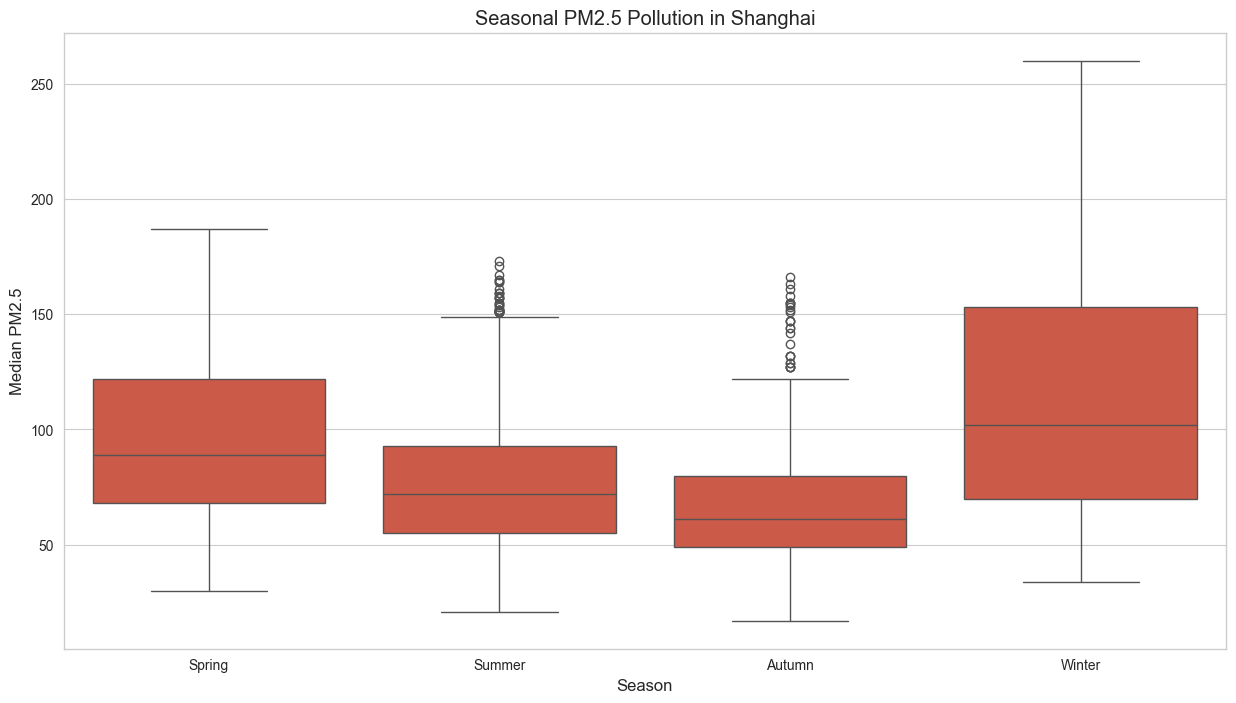

In [37]:
analyze_seasonal_pollution("Shanghai")

### Hypothesis-Driven Analysis

##### Hypothesis 1: The COVID-19 lockdown in Wuhan drastically reduced traffic-related pollution (NO2) compared to other cities.

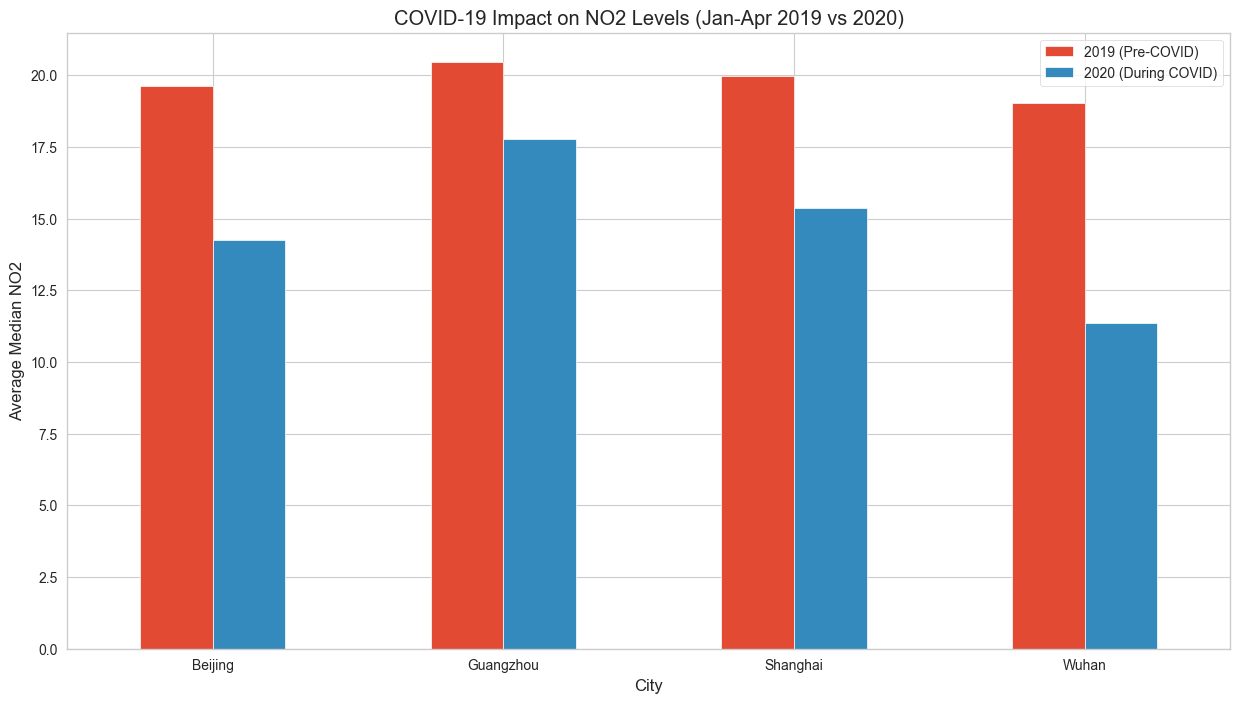

In [17]:
# Isolate NO2 data for key cities
cities_to_compare = ['Wuhan', 'Beijing', 'Shanghai', 'Guangzhou']
no2_data = df[(df['City'].isin(cities_to_compare)) & (df['Specie'] == 'no2')]

# Define time periods: Jan-Apr for 2019 (before) and 2020 (during)
no2_before = no2_data[(no2_data['year'] == 2019) & (no2_data['month'].isin([1,2,3,4]))]
no2_during = no2_data[(no2_data['year'] == 2020) & (no2_data['month'].isin([1,2,3,4]))]

# Calculate average pollution
avg_before = no2_before.groupby('City')['median'].mean().rename('2019 (Pre-COVID)')
avg_during = no2_during.groupby('City')['median'].mean().rename('2020 (During COVID)')

# Combine and plot
comparison_df = pd.concat([avg_before, avg_during], axis=1)
comparison_df.plot(kind='bar', rot=0)
plt.title('COVID-19 Impact on NO2 Levels (Jan-Apr 2019 vs 2020)')
plt.ylabel('Average Median NO2')
plt.show()

##### Hypothesis 2: China's "Blue Sky Defence Plan" (starting 2018) led to a noticeable reduction in PM2.5 in key industrial regions.

In [18]:
# Analyze PM2.5 trend in a city before and after the policy
def analyze_blue_sky_effect(city_name='Beijing'):
    city_pm25 = df[(df["City"] == city_name) & (df["Specie"] == "pm25")]
    city_pm25_yearly = city_pm25.groupby('year')['median'].mean()

    plt.figure()
    city_pm25_yearly.plot(kind='bar', color='skyblue')
    plt.axvline(x=2017.5 - city_pm25_yearly.index[0], color='r', linestyle='--', label='"Blue Sky" Plan Start') # Approximating line position
    plt.title(f'Average Annual PM2.5 in {city_name}')
    plt.ylabel('Average Median PM2.5')
    plt.xlabel('Year')
    plt.xticks(rotation=45)
    plt.legend()

    plt.show()

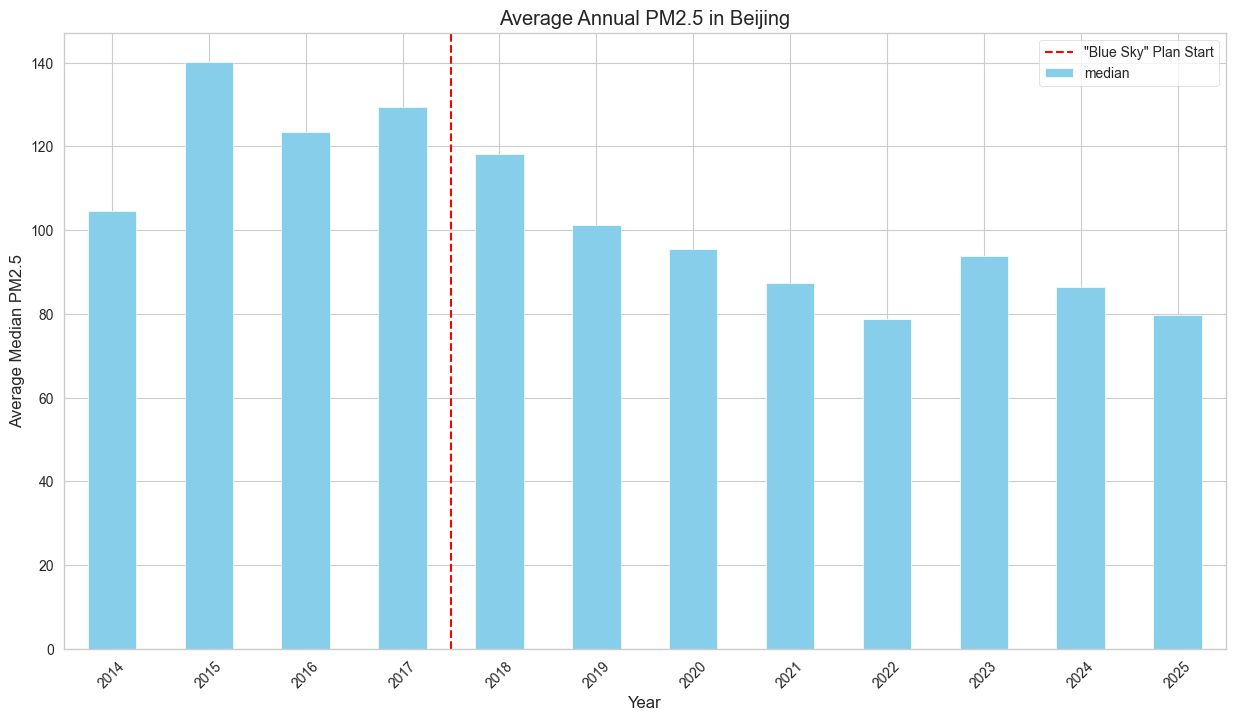

In [19]:
analyze_blue_sky_effect('Beijing')

### Analysis 1: The "Big Picture" - China's National Pollution Trends

**Action:** Generate a line chart showing the average annual pollution levels for PM2.5, NO2, and SO2.

**Story it tells:** This chart will immediately show if China's air quality has been improving, worsening, or stagnating over the last decade.

<Figure size 1400x800 with 0 Axes>

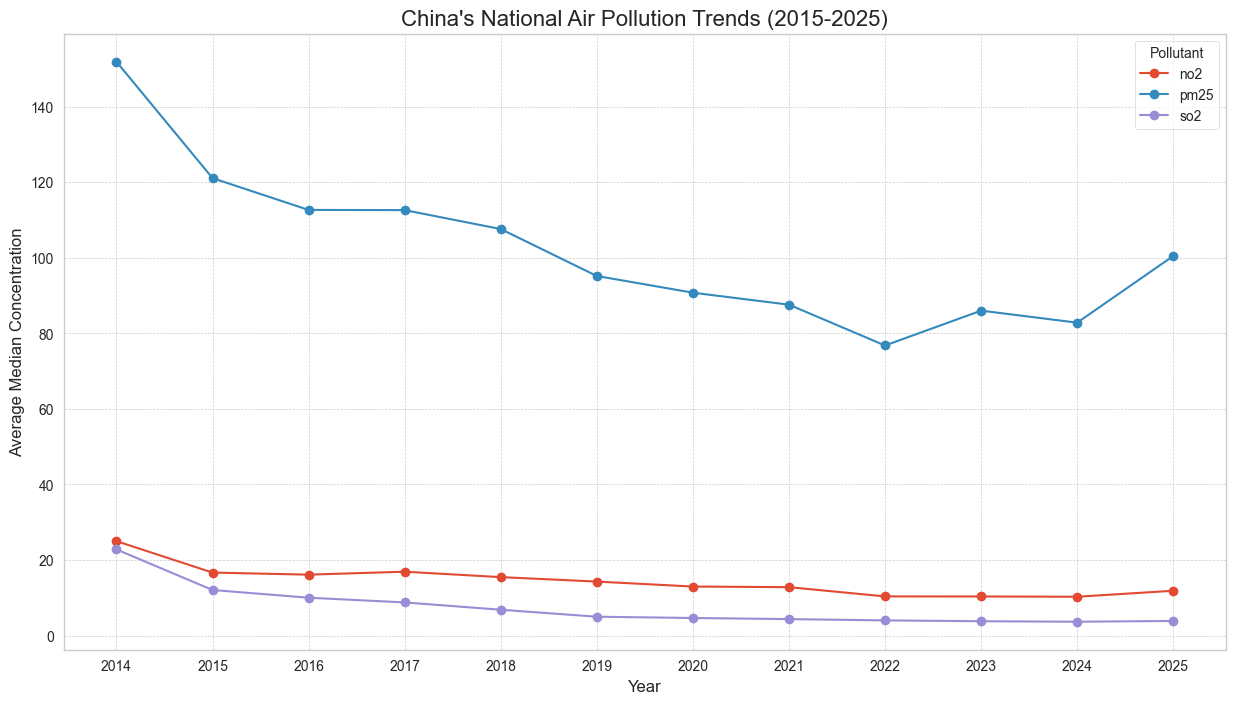

In [20]:
# Analyze multiple key pollutants
pollutants_to_plot = ['pm25', 'no2', 'so2']
df_pollutants = df[df['Specie'].isin(pollutants_to_plot)]

# Group by year and pollutant, then calculate the mean of the 'median' column
national_trends = df_pollutants.groupby(['year', 'Specie'])['median'].mean().unstack()

# Plotting the results
plt.figure(figsize=(14, 8))
national_trends.plot(kind='line', marker='o')

plt.title("China's National Air Pollution Trends (2015-2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average Median Concentration", fontsize=12)
plt.xticks(national_trends.index) # Ensure all years are marked on the x-axis
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Pollutant')
plt.show()

### Analysis 2: The "Hotspots" - Geospatial Heatmap of Pollution

**Action:** Create a map where each city is marked with a circle. The size and color of the circle will represent the severity of its average PM2.5 pollution.

**Story it tells:** This visual answers: "Where in China is the air pollution problem most severe?"

**Note:** The dataset does not contain latitude and longitude data for the cities. To create a map, we need to add this information.

In [21]:
# City coordinates
city_coords = {
    'Anyang': [36.103, 114.352], 'Beijing': [39.904, 116.407], 'Changchun': [43.817, 125.323],
    'Changsha': [28.228, 112.938], 'Changzhou': [31.783, 119.965], 'Chengdu': [30.572, 104.066],
    'Chongqing': [29.563, 106.551], 'Dongguan': [23.046, 113.746], 'Foshan': [23.021, 113.121],
    'Fushun': [41.884, 123.916], 'Fuzhou': [26.074, 119.296], 'Guangzhou': [23.129, 113.264],
    'Guiyang': [26.647, 106.630], 'Haikou': [20.045, 110.349], 'Hangzhou': [30.274, 120.155],
    'Harbin': [45.803, 126.535], 'Hefei': [31.820, 117.227], 'Hegang': [47.345, 130.296],
    'Hohhot': [40.842, 111.766], 'Jieyang': [23.543, 116.363], 'Jinan': [36.651, 117.120],
    'Kunming': [25.042, 102.712], 'Lanzhou': [36.061, 103.834], 'Lhasa': [29.645, 91.117],
    'Nanchang': [28.683, 115.858], 'Nanjing': [32.060, 118.796], 'Nanning': [22.817, 108.366],
    'Ningbo': [29.868, 121.544], 'Qingdao': [36.067, 120.382], 'Qinhuangdao': [39.932, 119.600],
    'Qiqihar': [47.342, 123.955], 'Shanghai': [31.230, 121.473], 'Shantou': [23.369, 116.714],
    'Shenyang': [41.805, 123.431], 'Shenzhen': [22.543, 114.057], 'Shijiazhuang': [38.042, 114.514],
    'Shiyan': [32.646, 110.775], 'Suzhou': [31.298, 120.585], 'Taiyuan': [37.873, 112.562],
    'Tianjin': [39.084, 117.200], 'Wuhan': [30.592, 114.305], 'Wuxi': [31.568, 120.301],
    'Xiamen': [24.479, 118.089], 'Xining': [36.617, 101.778], 'Xinxiang': [35.305, 113.926],
    'Xi’an': [34.341, 108.939], 'Xuchang': [34.020, 113.821], 'Yinchuan': [38.487, 106.231],
    'Yunfu': [22.925, 112.039], 'Zhengzhou': [34.746, 113.625], 'Zhuzhou': [27.833, 113.150],
    'Ürümqi': [43.825, 87.616]
}

In [22]:
# Calculate average PM2.5 for each city
pm25_data = df[df['Specie'] == 'pm25']
city_avg_pm25 = pm25_data.groupby('City')['median'].mean().reset_index()

In [23]:
# Map coordinates to the aggregated data
city_avg_pm25['lat'] = city_avg_pm25['City'].map(lambda city: city_coords.get(city, [None, None])[0])
city_avg_pm25['lon'] = city_avg_pm25['City'].map(lambda city: city_coords.get(city, [None, None])[1])
city_avg_pm25.dropna(inplace=True) # Remove cities for which we don't have coordinates

In [24]:
# Define a function to map pollution levels to colors
def get_color_for_pm25(level):
    """Assigns a color based on PM2.5 AQI standards."""
    if level <= 50:
        return 'green'      # Good
    elif level <= 100:
        return 'orange'     # Moderate
    elif level <= 150:
        return 'red'        # Unhealthy for Sensitive Groups
    elif level <= 200:
        return 'purple'     # Unhealthy
    else:
        return 'maroon'     # Very Unhealthy / Hazardous


In [25]:
# Create the map
map_center = [35.8617, 104.1954] # Center of China
china_map = folium.Map(location=map_center, zoom_start=5, tiles='CartoDB positron')

In [26]:
# Add a circle for each city
for _, city_row in city_avg_pm25.iterrows():
    folium.Circle(
        location=[city_row['lat'], city_row['lon']],
        popup=f"<b>{city_row['City']}</b><br>Avg PM2.5: {city_row['median']:.2f}",
        radius=10000, # A fixed radius in meters for all circles
        color=get_color_for_pm25(city_row['median']),
        fill=True,
        fill_opacity=0.7
    ).add_to(china_map)

In [27]:
# Create and add a custom legend to the map
legend_html = """
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 180px; height: 180px;
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: .85;
     ">
     &nbsp; <b>PM2.5 Pollution Level</b> <br>
     &nbsp; <i class="fa fa-circle" style="color:green"></i> &nbsp; Good (&le; 50) <br>
     &nbsp; <i class="fa fa-circle" style="color:orange"></i> &nbsp; Moderate (51-100) <br>
     &nbsp; <i class="fa fa-circle" style="color:red"></i> &nbsp; Unhealthy (101-150) <br>
     &nbsp; <i class="fa fa-circle" style="color:purple"></i> &nbsp; Very Unhealthy (151-200) <br>
     &nbsp; <i class="fa fa-circle" style="color:maroon"></i> &nbsp; Hazardous (>200)
</div>
"""
china_map.get_root().html.add_child(folium.Element(legend_html))

In [28]:
# Display the map
china_map

In [29]:
# Save the map for dash app
china_map.save('china_air_quality_map.html')

### Analysis 3: The "Smoking Gun" - Pollutant Inter-correlation

Are certain pollutants released from the same sources? A correlation heatmap can reveal these relationships. For example, a strong positive correlation between SO2 and PM10 might suggest industrial activity or coal burning as a common source.

**Action:** Create a correlation heatmap for the median values of all pollutants.

**Story it tells:** This visual reveals the hidden chemical and source relationships in the atmosphere.

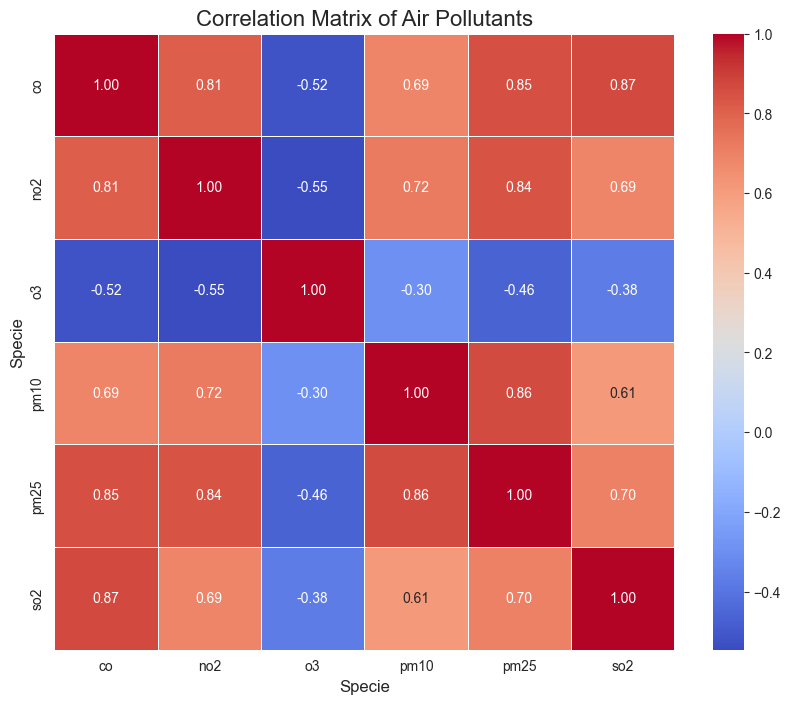

In [30]:
# Pollutant Correlation Heatmap
# Pivot the table so pollutants are columns
df_pivot = df.pivot_table(index='Date', columns='Specie', values='median')
# Calculate the correlation matrix
correlation_matrix = df_pivot.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Air Pollutants', fontsize=16)
plt.show()

#### Save the processed dataframe for model training and visual app

In [31]:
df.to_csv('modified_dataframe.csv')